#**Car Price Prediction**

Importing libraries


In [584]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

importing dataset

In [585]:
df = pd.read_csv("/content/drive/MyDrive/dataset/car_data.csv")

In [586]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [587]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [588]:
df.ndim

2

In [589]:
df.shape

(4340, 8)

In [590]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [591]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [593]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [594]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [595]:
#df['Manufacturer'] = df['name'].str.extract(r'(\w+)')
#(\w+)\s+(\w+)
#import re

#import re

#text = "Toyota Corolla"
#new_text = re.sub(r'^\w+', '', text)
#print(new_text)


data manipulation

In [596]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [597]:
data = df.copy()

In [598]:
#create a column  new_fuel and palce at index 4
# replace values with  - petrol = 0,diesel -1,CNG-2,LPG - 3,ELECtric - 4

data['new_fuel'] = data['fuel'].map({'Petrol':0,'Diesel':1,'CNG':2,'LPG': 3,'Electric':4})
data['new_fuel'].unique()

array([0, 1, 2, 3, 4])

In [599]:
new_order = ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'new_fuel', 'seller_type', 'transmission','owner']
data = data[new_order]


In [600]:
new_data.head()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,0,0,0,0.0,14
1,135000,50000,0,0,0,0.0,14
2,600000,100000,1,0,0,0.0,9
3,250000,46000,0,0,0,0.0,4
4,450000,141000,1,0,0,1.0,7


In [601]:
#replace the seller type with indiv -0 , dealer -1 , trust - 2
data['new_seller_type'] = data['seller_type'].map({'Individual':0,'Dealer':1,'Trustmark Dealer':2})
data['new_seller_type'].unique()


array([0, 1, 2])

In [602]:
new_order = ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'new_fuel', 'seller_type','new_seller_type','transmission','owner']
data = data[new_order]
data.head()

,name,year,selling_price,km_driven,fuel,new_fuel,seller_type,new_seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,0,Individual,0,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,0,Individual,0,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,1,Individual,0,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,0,Individual,0,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,1,Individual,0,Manual,Second Owner


In [603]:
#copy

new_data = data.copy()
new_data

,name,year,selling_price,km_driven,fuel,new_fuel,seller_type,new_seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,0,Individual,0,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,0,Individual,0,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,1,Individual,0,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,0,Individual,0,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,1,Individual,0,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,1,Individual,0,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,1,Individual,0,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,0,Individual,0,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,1,Individual,0,Manual,First Owner


In [604]:
#maping the transmisson
data.transmission.unique()

new_data['transmission'] = new_data['transmission'].map({'Manual':0,'Automatic':1})


In [605]:
new_data['owner'].unique()

new_data['owner'] = data['owner'].map({'First Owner':0,'Second Owner':1,'Fouth & Above Owner':2,'Third Owner': 3,'Test Drive Car': 4})
new_data

,name,year,selling_price,km_driven,fuel,new_fuel,seller_type,new_seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,0,Individual,0,0,0.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,0,Individual,0,0,0.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,1,Individual,0,0,0.0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,0,Individual,0,0,0.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,1,Individual,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,1,Individual,0,0,1.0
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,1,Individual,0,0,1.0
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,0,Individual,0,0,1.0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,1,Individual,0,0,0.0


other alternative

In [606]:
from sklearn.preprocessing import LabelEncoder

In [607]:
da  =df[['fuel','seller_type']]
da.head()

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual


In [608]:
da['fuel'] = LabelEncoder().fit_transform(da['fuel']) #assigns new lables itself

<ipython-input-608-c4c0749064f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da['fuel'] = LabelEncoder().fit_transform(da['fuel']) #assigns new lables itself


In [609]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [610]:

var = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['seller_type'])], remainder='passthrough')


In [611]:
#or use pandas

a = data.copy()

In [612]:
d = pd.get_dummies(a)

d


,year,selling_price,km_driven,new_fuel,new_seller_type,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,False,False,False,False,False,...,False,True,False,False,True,True,False,False,False,False
1,2007,135000,50000,0,0,False,False,False,False,False,...,False,True,False,False,True,True,False,False,False,False
2,2012,600000,100000,1,0,False,False,False,False,False,...,False,True,False,False,True,True,False,False,False,False
3,2017,250000,46000,0,0,False,False,False,False,False,...,False,True,False,False,True,True,False,False,False,False
4,2014,450000,141000,1,0,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,0,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
4336,2014,409999,80000,1,0,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
4337,2009,110000,83000,0,0,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
4338,2016,865000,90000,1,0,False,False,False,False,False,...,False,True,False,False,True,True,False,False,False,False


END

In [613]:
new_data

,name,year,selling_price,km_driven,fuel,new_fuel,seller_type,new_seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,0,Individual,0,0,0.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,0,Individual,0,0,0.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,1,Individual,0,0,0.0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,0,Individual,0,0,0.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,1,Individual,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,1,Individual,0,0,1.0
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,1,Individual,0,0,1.0
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,0,Individual,0,0,1.0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,1,Individual,0,0,0.0


In [614]:
#create a column of number of years = current year - year

new_data['new_year'] = 2021 - new_data['year']

new_data.head(1)


,name,year,selling_price,km_driven,fuel,new_fuel,seller_type,new_seller_type,transmission,owner,new_year
0,Maruti 800 AC,2007,60000,70000,Petrol,0,Individual,0,0,0.0,14


In [615]:
new_data.drop(['name','year','fuel','seller_type'],inplace = True,axis =1)

In [616]:
#rename selling price to current_seling price
new_data.rename(columns={'selling_price': 'current_selling_price','new_fuel':'fuel','new_seller_type':'seller_type','new_year':'no_of_years'}, inplace=True)
new_data.head(1)

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,0,0,0,0.0,14


In [617]:
new_data.corr()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
current_selling_price,1.000000,-0.192289,0.226883,0.240666,0.530205,-0.176973,-0.413922
km_driven,-0.192289,1.000000,0.274760,-0.187131,-0.120226,0.263556,0.419688
fuel,0.226883,0.274760,1.000000,0.011358,0.027507,0.015899,-0.090388
seller_type,0.240666,-0.187131,0.011358,1.000000,0.200191,-0.198887,-0.182458
transmission,0.530205,-0.120226,0.027507,0.200191,1.000000,-0.068795,-0.143800
owner,-0.176973,0.263556,0.015899,-0.198887,-0.068795,1.000000,0.370018
no_of_years,-0.413922,0.419688,-0.090388,-0.182458,-0.143800,0.370018,1.000000


<Axes: >

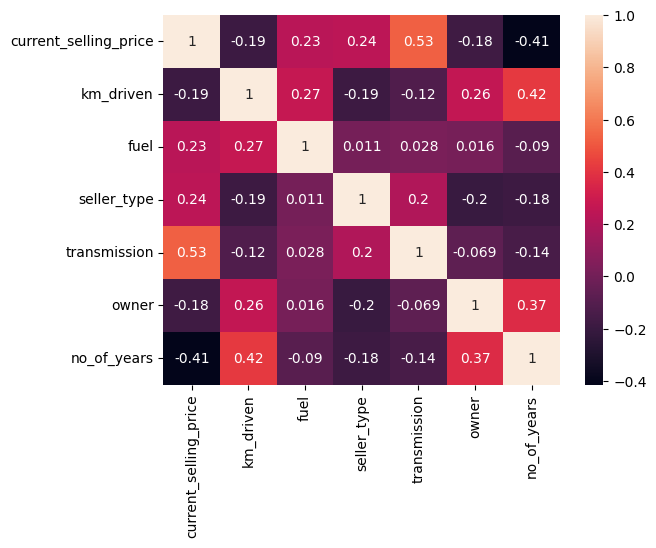

In [618]:
sns.heatmap(data= new_data.corr(), annot= True)

In [619]:
#sns.pairplot(new_data)

In [620]:
'''plt.figure(figsize =(100,100))
new_data.boxplot()
plt.xticks(rotation =45)
'''

'plt.figure(figsize =(100,100))\nnew_data.boxplot()\nplt.xticks(rotation =45)\n'

#**Machine Learning**

In [621]:
#select the features and targets

X = np.array(new_data.drop('current_selling_price',axis =1))
y = np.array(new_data['current_selling_price'])

#feature selection
-Feature scaling

#spliting the data

In [622]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#**Model Selection**

In [623]:
model = DecisionTreeRegressor()

#training the model

In [624]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [625]:
y_pred = model.predict(X_test)


model testing

In [626]:
comp = pd.DataFrame({'Actual values':y_test,'Predicted values':y_pred})
comp

,Actual values,Predicted values
0,165000,2.823193e+05
1,250000,4.668846e+05
2,120000,1.583952e+05
3,450000,5.136068e+05
4,730000,1.881205e+06
...,...,...
863,130000,1.513938e+05
864,350000,5.136068e+05
865,150000,2.823193e+05
866,650000,4.250000e+05


In [ ]:
'''plt.scatter(X_test.reshape(-1,1),y_test.reshape(-1,1),colour = 'red')
plt.scatter(X_test.reshape(-1,1),y_pred.reshape(-1,1),colour = 'green')
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("acutal vs pred")
'''

<Axes: >

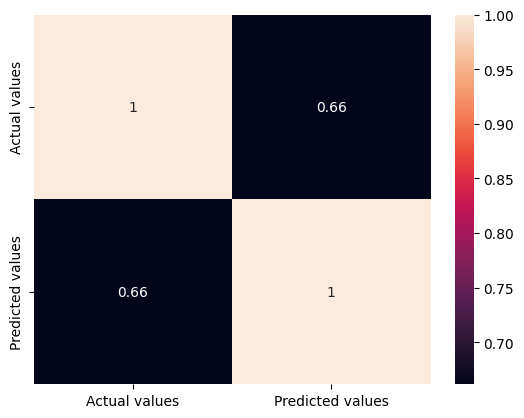

In [634]:
sns.heatmap(data = comp.corr(), annot=True)

#**Performance**

In [632]:
r2_score(y_test,y_pred)

0.43496498711211806